# Insurance Data - Linear Regression & Logistic


## Table of Contents

1. [Data Loading and Understanding](#section1)</br>
2. [Data preprocessing](#section2)</br>
    - 2.1 [Removing the columns with more than 50% missing values](#section201)</br>
    - 2.2 [Replacing the missing values with mean since all are numerical and standardized variables](#section202)</br>
    - 2.3 [Feature Selection](#section203)</br>
         - 2.3.1 [Generating Correlation Matrix with sample](#section231)</br>
         - 2.3.2 [List of features that are positively correlated with target variable 'Response'](#section232)</br>
         - 2.3.3 [Setting a threshold value in the final correlation matrix](#section233)</br>
         - 2.3.4 [Generating Heat Map](#section234)</br>
         - 2.3.5 [Features to consider](#section235)</br>
    - 2.4 [Data for final 12 Features](#section204)</br>
3. [Data visualization](#section3)</br>
    - 3.1 [Is there any linear relation between Response and features which having continious values](#section301)</br>
    - 3.2 [Distribution of Features with continious values](#section302)<br/>
4. [Linear Rgression](#section4)</br>
    - 4.1 [Building the model with GridSearchCV](#section401)</br>
5. [Logistic Regression](#section5)</br>
    - 5.1 [Using the Model for Prediction](#section501)</br>
    - 5.2 [Model evaluation](#section502)</br>

<a id=section1></a>
### 1. Data Loading and Understanding

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

insurance_data = 'https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/insurance_data.csv'
insurance = pd.read_csv(insurance_data)

In [2]:
insurance.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


<a id=section103></a>
#### 1.3 Finding the levels of Ordinal target variable 'Response'

In [3]:
insurance.Response.unique()

array([8, 4, 1, 6, 2, 7, 3, 5], dtype=int64)

<a id=section2></a>
### 2. Data Preprocessing

<a id=section201></a>
#### 2.1 Removing the columns with more than 50% missing values

In [4]:
half_count = len(insurance)/2
print('The threshold for missing data:', half_count)
insurance = insurance.dropna(thresh=half_count, axis=1)
insurance.shape

The threshold for missing data: 29690.5


(59381, 122)

In [5]:
products = ['Product_Info_1', 
            'Product_Info_2', 
            'Product_Info_3', 
            #'Product_Info_4', 
            'Product_Info_5', 
            'Product_Info_6', 
            'Product_Info_7']

for product in products:
    print('{0}:{1}'.format(product, insurance[product].unique()))

Product_Info_1:[1 2]
Product_Info_2:['D3' 'A1' 'E1' 'D4' 'D2' 'A8' 'A2' 'D1' 'A7' 'A6' 'A3' 'A5' 'C4' 'C1'
 'B2' 'C3' 'C2' 'A4' 'B1']
Product_Info_3:[10 26 21 31 29 37 15 36  8  4 30 11 23 28 13  9  6 33 32  3 18  2 22 17
 38 19 34 12 24 20  1 16  5 27]
Product_Info_5:[2 3]
Product_Info_6:[1 3]
Product_Info_7:[1 3 2]


<a id=section202></a>
#### 2.2 Replacing the missing values with mean since all are numerical and standardized variables

In [6]:
col_missing_data = insurance.columns[insurance.isnull().any()].tolist()

for col in col_missing_data:
    print(insurance[col].mean())
    insurance[col] = insurance[col].fillna(insurance[col].mean())
insurance.isnull().sum()

0.07758209953084522
0.0062826743249304665
0.361468804001489
0.0017330636999304946
0.4745500642717966
0.444890253537949
7.962172225303019


Id                     0
Product_Info_1         0
Product_Info_2         0
Product_Info_3         0
Product_Info_4         0
Product_Info_5         0
Product_Info_6         0
Product_Info_7         0
Ins_Age                0
Ht                     0
Wt                     0
BMI                    0
Employment_Info_1      0
Employment_Info_2      0
Employment_Info_3      0
Employment_Info_4      0
Employment_Info_5      0
Employment_Info_6      0
InsuredInfo_1          0
InsuredInfo_2          0
InsuredInfo_3          0
InsuredInfo_4          0
InsuredInfo_5          0
InsuredInfo_6          0
InsuredInfo_7          0
Insurance_History_1    0
Insurance_History_2    0
Insurance_History_3    0
Insurance_History_4    0
Insurance_History_5    0
                      ..
Medical_Keyword_20     0
Medical_Keyword_21     0
Medical_Keyword_22     0
Medical_Keyword_23     0
Medical_Keyword_24     0
Medical_Keyword_25     0
Medical_Keyword_26     0
Medical_Keyword_27     0
Medical_Keyword_28     0


<a id=section203></a>
#### 2.3 Feature Selection

Since there are 122 columns, its difficult to perform graphical visualization through plots. Hence going with correlation matrix to identify relevant features with positive relationships.

In [7]:
insurance_sample = insurance.sample(10000)
insurance_sample.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,39520.010000,1.028600,24.523100,0.327431,2.007300,2.675000,1.044300,0.405539,0.708680,0.293478,...,0.057900,0.012300,0.046700,0.009500,0.007100,0.01620,0.008200,0.020800,0.054200,5.643200
std,22713.611954,0.166688,4.936446,0.282216,0.085132,0.737855,0.294187,0.198452,0.074671,0.089102,...,0.233566,0.110227,0.211006,0.097009,0.083966,0.12625,0.090186,0.142721,0.226423,2.456888
min,2.000000,1.000000,2.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.363636,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000
25%,20072.250000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.000000
50%,39430.500000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,6.000000
75%,58977.500000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.349372,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,37.000000,1.000000,3.000000,3.000000,3.000000,0.925373,1.000000,0.828452,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,8.000000


<a id=section231></a>
#### 2.3.1 Generating Correlation Matrix with sample

In [8]:
insurancecorr = insurance.corr()
insurancecorr
insurancecorr.to_excel('EntirecorrelationmatrixNew.xls')

#Taking only the positive values of Response feature from the matrix 
#for it indicates its positive correlation with other features
cordata = insurancecorr[insurancecorr['Response'] > 0]
print(cordata.shape)

(44, 121)


In [9]:
cordata

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
Id,1.000000,-0.002870,-0.001869,-0.002914,-0.004195,0.005038,0.002117,0.001764,0.003674,0.005648,...,-0.001746,0.005721,-0.004575,-0.007633,0.001917,-0.000286,0.002684,0.001199,-0.001122,0.000462
Product_Info_1,-0.002870,1.000000,0.027573,0.059829,0.069720,-0.078684,0.012169,-0.077429,0.052720,-0.004035,...,-0.002782,0.004495,-0.007697,-0.014055,-0.008247,-0.006719,-0.010638,0.004402,-0.008469,0.014692
Product_Info_4,-0.002914,0.059829,0.048775,1.000000,0.040433,-0.089075,0.051542,-0.261356,0.141780,-0.028041,...,-0.021352,-0.015152,-0.041935,-0.039131,-0.002671,-0.019914,-0.047318,-0.021974,-0.030896,0.202434
Employment_Info_1,0.004869,0.047371,0.151430,0.350919,0.061047,-0.130388,0.064021,0.095973,0.200479,0.097906,...,-0.021539,0.021091,-0.038191,0.017637,0.008182,-0.012017,-0.011105,-0.002247,0.039775,0.040833
Employment_Info_2,0.003494,0.032271,0.191771,0.140759,0.018117,-0.013434,-0.001324,-0.188086,0.135446,0.068286,...,-0.034667,-0.024606,-0.053994,-0.042543,-0.005849,-0.024232,-0.052613,-0.041976,-0.024149,0.078857
Employment_Info_5,-0.001187,-0.018840,-0.764707,-0.077297,-0.025496,0.022836,-0.022079,-0.067094,-0.235636,-0.183968,...,0.039550,-0.004025,0.035872,-0.033148,-0.004955,0.043379,0.005742,0.009997,-0.038705,0.054673
Employment_Info_6,-0.002493,0.010990,-0.004456,0.212881,0.041302,-0.121671,0.047181,0.345738,0.075623,0.013881,...,-0.014941,0.053086,-0.008741,0.045472,0.008186,0.013288,0.029291,0.022474,0.054451,0.016017
InsuredInfo_1,-0.000660,-0.041654,-0.033652,0.060936,-0.021068,-0.097197,-0.013075,-0.025805,-0.223504,-0.227201,...,-0.089009,-0.044012,-0.079248,-0.024321,-0.014251,-0.011853,-0.037116,-0.036471,-0.069120,0.083729
InsuredInfo_4,-0.002146,-0.047523,-0.056197,-0.073148,-0.018299,0.046990,-0.018518,0.061104,-0.103769,-0.069975,...,-0.020977,-0.000289,-0.013966,-0.002047,0.002431,0.005686,0.004370,-0.017860,-0.016786,0.022902
InsuredInfo_6,-0.002743,-0.047975,-0.398228,-0.138304,-0.056459,0.039894,-0.047159,-0.077044,-0.715837,-0.485465,...,0.066671,-0.015547,0.080428,-0.086260,-0.013040,0.083214,-0.002700,0.017739,-0.114091,0.130476


<a id=section232></a>
#### 2.3.2 List of features that are positively correlated with target variable 'Response'

In [10]:
corcolumns = ['Product_Info_1','Product_Info_4','Employment_Info_1','Employment_Info_2','Employment_Info_5','Employment_Info_6','InsuredInfo_1',
'InsuredInfo_4','InsuredInfo_6','Insurance_History_1','Insurance_History_3','Insurance_History_5','Insurance_History_8','Family_Hist_1','Medical_History_1',
'Medical_History_2','Medical_History_3','Medical_History_4','Medical_History_6','Medical_History_7','Medical_History_9','Medical_History_11',
'Medical_History_13','Medical_History_14','Medical_History_17','Medical_History_20','Medical_History_22','Medical_History_23',
'Medical_History_26','Medical_History_27','Medical_History_29','Medical_History_31','Medical_History_33','Medical_History_34','Medical_History_37',
'Medical_History_39','Medical_History_40','Medical_Keyword_6','Medical_Keyword_8','Medical_Keyword_20','Medical_Keyword_39','Medical_Keyword_45',
'Response'
]

In [11]:
cordataFeatures = cordata[corcolumns]
print(cordataFeatures.shape)
print(cordataFeatures)

(44, 43)
                     Product_Info_1  Product_Info_4  Employment_Info_1  \
Id                        -0.002870       -0.002914           0.004869   
Product_Info_1             1.000000        0.059829           0.047371   
Product_Info_4             0.059829        1.000000           0.350919   
Employment_Info_1          0.047371        0.350919           1.000000   
Employment_Info_2          0.032271        0.140759           0.165424   
Employment_Info_5         -0.018840       -0.077297          -0.198476   
Employment_Info_6          0.010990        0.212881           0.365999   
InsuredInfo_1             -0.041654        0.060936          -0.004413   
InsuredInfo_4             -0.047523       -0.073148          -0.065679   
InsuredInfo_6             -0.047975       -0.138304          -0.227403   
Insurance_History_1        0.013058        0.049299          -0.035141   
Insurance_History_3       -0.008187       -0.008779           0.148873   
Insurance_History_5        0.

In [12]:
#Checking the target variable Response has got only positive values 
cordataFeatures.loc['Response']

Product_Info_1         0.014692
Product_Info_4         0.202434
Employment_Info_1      0.040833
Employment_Info_2      0.078857
Employment_Info_5      0.054673
Employment_Info_6      0.016017
InsuredInfo_1          0.083729
InsuredInfo_4          0.022902
InsuredInfo_6          0.130476
Insurance_History_1    0.001245
Insurance_History_3    0.007177
Insurance_History_5    0.015208
Insurance_History_8    0.007376
Family_Hist_1          0.072107
Medical_History_1      0.095872
Medical_History_2      0.016036
Medical_History_3      0.020316
Medical_History_4      0.239896
Medical_History_6      0.159230
Medical_History_7      0.027073
Medical_History_9      0.067236
Medical_History_11     0.036098
Medical_History_13     0.134863
Medical_History_14     0.033373
Medical_History_17     0.073633
Medical_History_20     0.077327
Medical_History_22     0.047906
Medical_History_23     0.286584
Medical_History_26     0.000796
Medical_History_27     0.084595
Medical_History_29     0.078089
Medical_

<a id=section233></a>
#### 2.3.3 Setting a threshold value in the final correlation matrix of positively correlated features with target variabe to finalize the list of features for model building

In [13]:
#The threshold value here is 0.1
#Any feature with correlation index > 0.1 with respect to target variable 'Response' is considered
cordataThreshold = cordataFeatures[cordataFeatures['Response']>=0.1]
print(cordataThreshold)

                    Product_Info_1  Product_Info_4  Employment_Info_1  \
Product_Info_4            0.059829        1.000000           0.350919   
InsuredInfo_6            -0.047975       -0.138304          -0.227403   
Medical_History_4        -0.022528        0.050651          -0.026213   
Medical_History_6         0.008830        0.031083          -0.039187   
Medical_History_13        0.007037        0.042634           0.046326   
Medical_History_23        0.034479        0.163171          -0.007491   
Medical_History_33       -0.055632       -0.003232          -0.021101   
Medical_History_39        0.022837        0.090880           0.018643   
Medical_History_40       -0.004703        0.021851          -0.000808   
Response                  0.014692        0.202434           0.040833   

                    Employment_Info_2  Employment_Info_5  Employment_Info_6  \
Product_Info_4               0.140759          -0.077297           0.212881   
InsuredInfo_6               -0.157670 

In [14]:
final_features = ['Product_Info_4', 'InsuredInfo_6', 'Medical_History_4',
                 'Medical_History_6', 'Medical_History_13', 'Medical_History_23', 'Medical_History_33',
                 'Medical_History_39', 'Medical_History_40', 'Response']
finaldata = cordataThreshold[final_features]
print(finaldata.shape)
print(finaldata)

(10, 10)
                    Product_Info_4  InsuredInfo_6  Medical_History_4  \
Product_Info_4            1.000000      -0.138304           0.050651   
InsuredInfo_6            -0.138304       1.000000           0.220664   
Medical_History_4         0.050651       0.220664           1.000000   
Medical_History_6         0.031083       0.113257           0.065822   
Medical_History_13        0.042634      -0.102994           0.079797   
Medical_History_23        0.163171       0.076872           0.093116   
Medical_History_33       -0.003232       0.122018           0.259491   
Medical_History_39        0.090880      -0.044168           0.020795   
Medical_History_40        0.021851       0.066524           0.113243   
Response                  0.202434       0.130476           0.239896   

                    Medical_History_6  Medical_History_13  Medical_History_23  \
Product_Info_4               0.031083            0.042634            0.163171   
InsuredInfo_6                0.11325

<a id=section234></a>
#### 2.3.4 Generating Heat Map

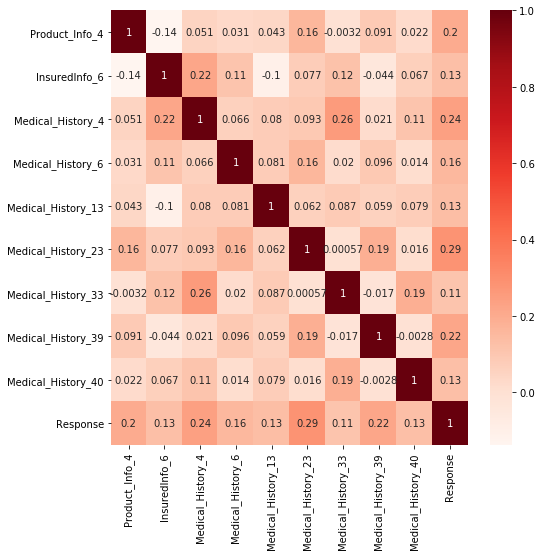

In [15]:
plt.figure(figsize=(8,8))
sns.heatmap(data=finaldata, annot=True, cmap='Reds')

<a id=section235></a>
####  2.3.5 Features to consider

['Product_Info_2','Product_Info_4', 'InsuredInfo_6', 'Medical_History_4',
                 'Medical_History_6', 'Medical_History_13', 'Medical_History_23', 'Medical_History_33',
                 'Medical_History_39', 'Medical_History_40', 'Response']

(array([ 6207.,  6552.,  1013.,     0.,  1428.,  5432.,     0., 11233.,
         8027., 19489.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <a list of 10 Patch objects>)

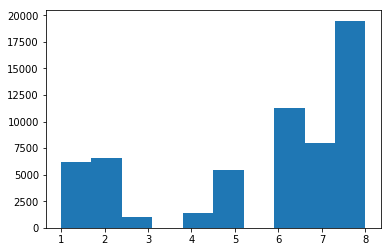

In [16]:
plt.hist(insurance.Response)

<a id=section204></a>
#### 2.4 Data for final 11 Features

In [17]:
#Medical_History_15 to be reconsidered for higher correlation with target variable-Response
feature_cols = ['Product_Info_4', 'InsuredInfo_6', 'Medical_History_4', 'Medical_History_6', 'Medical_History_13', 'Medical_History_23', 'Medical_History_33', 'Medical_History_39', 'Medical_History_40', 'Response']

In [18]:
final_data = insurance[feature_cols]
print('Shape of final data:', final_data.shape)
final_data.head()

Shape of final data: (59381, 10)


,Product_Info_4,InsuredInfo_6,Medical_History_4,Medical_History_6,Medical_History_13,Medical_History_23,Medical_History_33,Medical_History_39,Medical_History_40,Response
0,0.076923,2,1,3,3,3,1,3,3,8
1,0.076923,2,1,3,3,3,3,3,3,4
2,0.076923,1,2,3,3,3,3,3,3,8
3,0.487179,2,2,3,3,3,3,3,3,8
4,0.230769,2,2,3,3,3,3,3,3,8


<a id=section3></a>
### 3 Data Visualization

<a id=section301></a>
#### 3.1 Is there any linear relation between Response and features which having continious values 

D:\Personal\Softwares\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Personal\Softwares\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Personal\Softwares\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Personal\Softwares\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


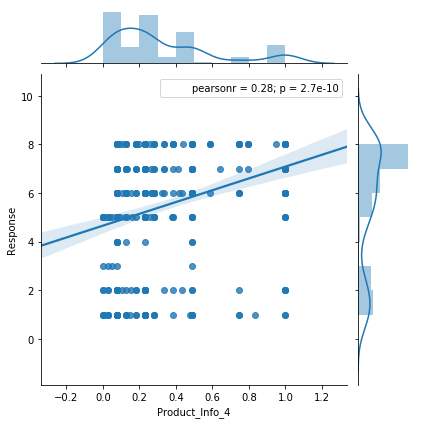

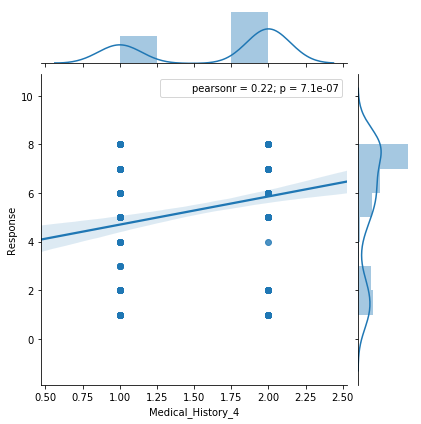

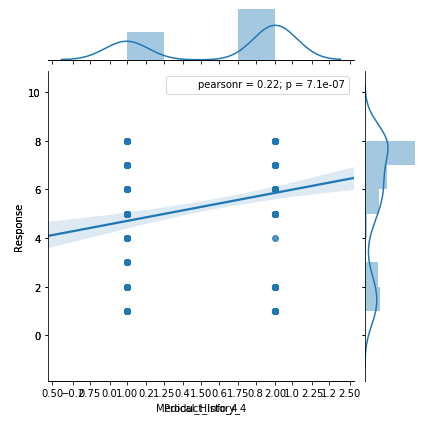

In [19]:
final_sample = final_data.sample(500)

final_sample.head()

#sns.pairplot(data=final_sample, size=5, aspect=1)

JG1 = sns.jointplot("Product_Info_4", "Response", data=final_sample, kind='reg')
JG2 = sns.jointplot("Medical_History_4", "Response", data=final_sample, kind='reg')

#subplots migration
f = plt.figure()
for J in [JG1, JG2]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A)

<a id=section302></a>
#### 3.2 Distribution of Features with continious values 


D:\Personal\Softwares\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Personal\Softwares\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Personal\Softwares\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


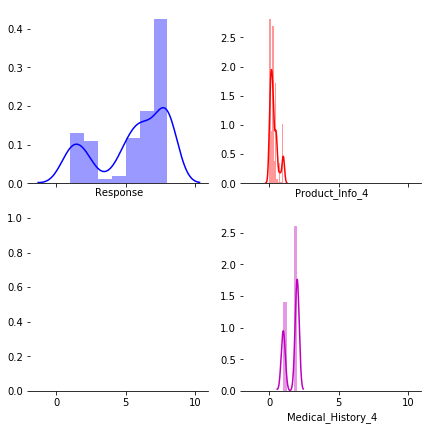

In [20]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)                                      # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(final_sample.Response, color="b", ax=axes[0, 0])

sns.distplot(final_sample.Product_Info_4, color="r", ax=axes[0, 1])

sns.distplot(final_sample.Medical_History_4, color="m", ax=axes[1, 1])

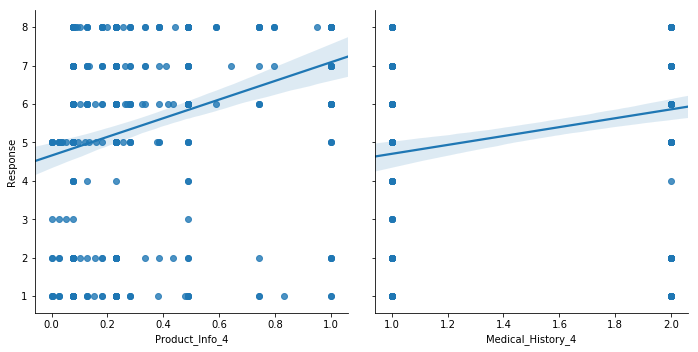

In [21]:
sns.pairplot(final_sample, x_vars=['Product_Info_4', 'Medical_History_4'], y_vars='Response', size=5, aspect=1, kind='reg')

__Histomgram plots__

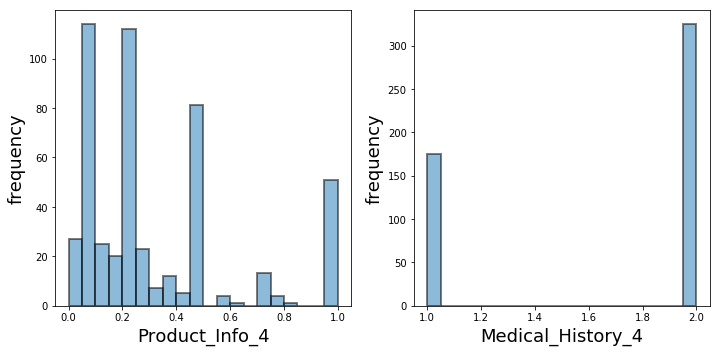

In [22]:
# display continuous data

def plot_histgrams(data):
    ncols = len(data.columns)
    fig = plt.figure(figsize=(5 * 5, 5 * (ncols // 5 + 1)))
    for i, col in enumerate(data.columns):
        X = data[col]
        plt.subplot(ncols // 5 + 1, 5, i + 1)
        plt.hist(X, bins=20, alpha=0.5, \
                 edgecolor="black", linewidth=2.0)
        plt.xlabel(col, fontsize=18)
        plt.ylabel("frequency", fontsize=18)
    fig.tight_layout()
    plt.show()
    
continuous_data = final_sample[['Product_Info_4', 'Medical_History_4']]    
plot_histgrams(continuous_data)

__Distirbution of categirical data__

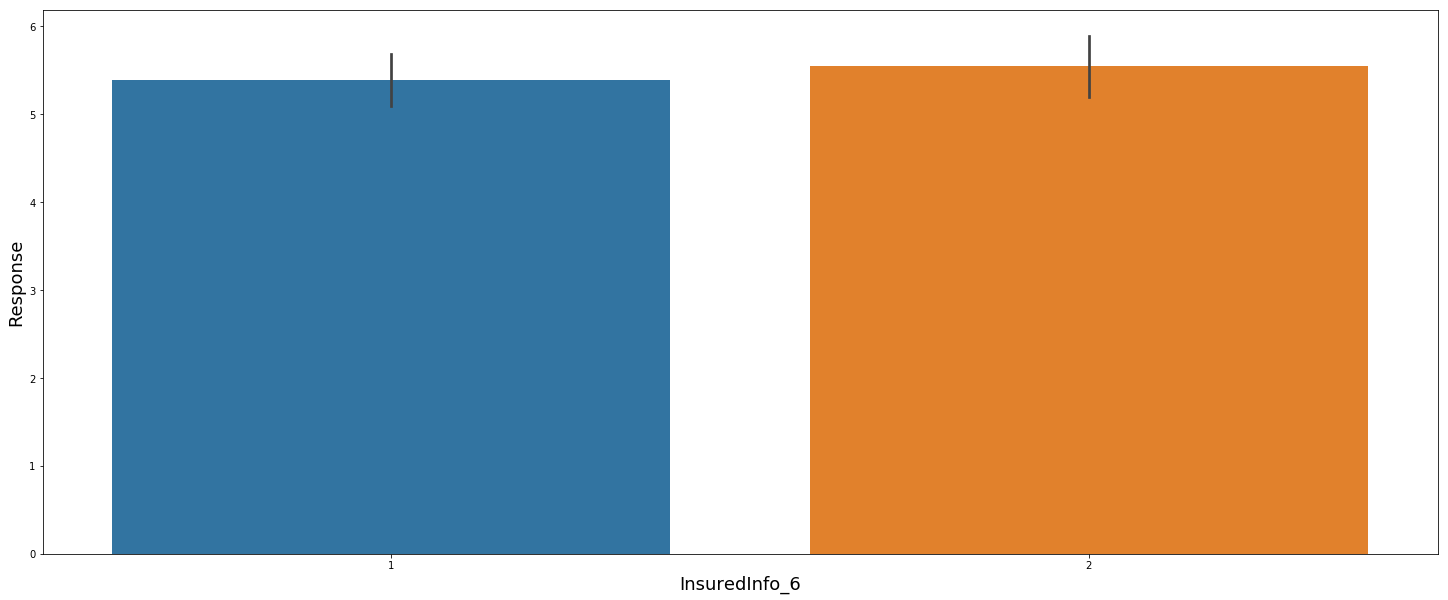

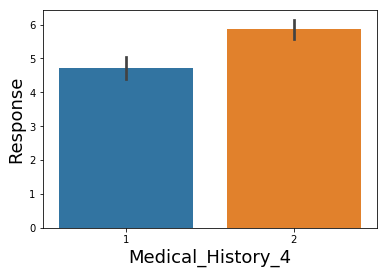

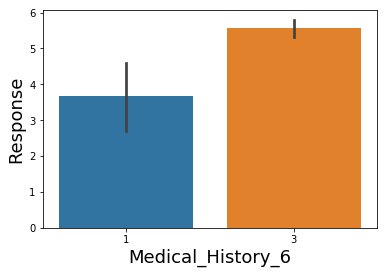

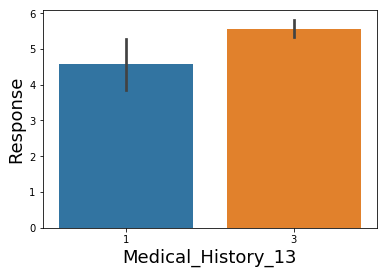

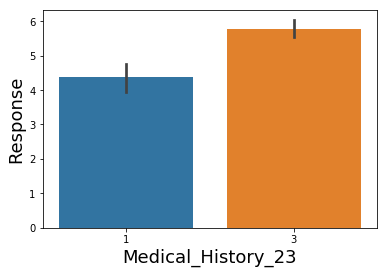

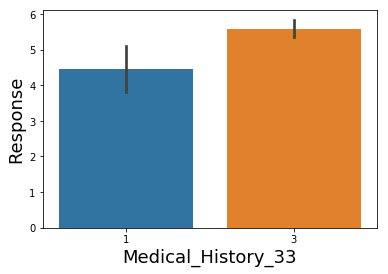

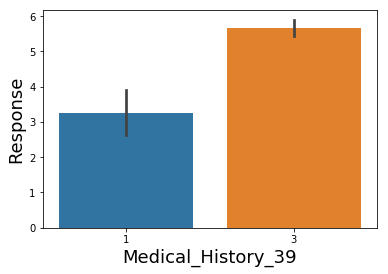

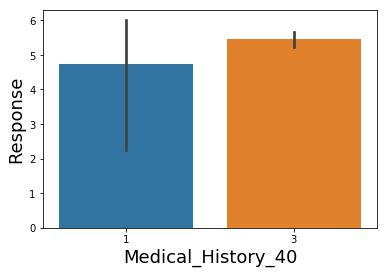

In [23]:
# display categorical data

def plot_categoricals(data):
    ncols = len(data.columns)
    fig = plt.figure(figsize=(5 * 5, 5 * (ncols // 5 + 1)))
    for i, col in enumerate(data.columns):
        sns.barplot(x=col, y="Response", data = final_sample)
        plt.xlabel(col, fontsize=18)
        plt.ylabel("Response", fontsize=18)
        plt.show()
    fig.tight_layout()
    #plt.show()

categorical_data = final_sample[['InsuredInfo_6', 'Medical_History_4', 'Medical_History_6', 'Medical_History_13', 'Medical_History_23', 'Medical_History_33', 'Medical_History_39', 'Medical_History_40']]    
plot_categoricals(categorical_data)

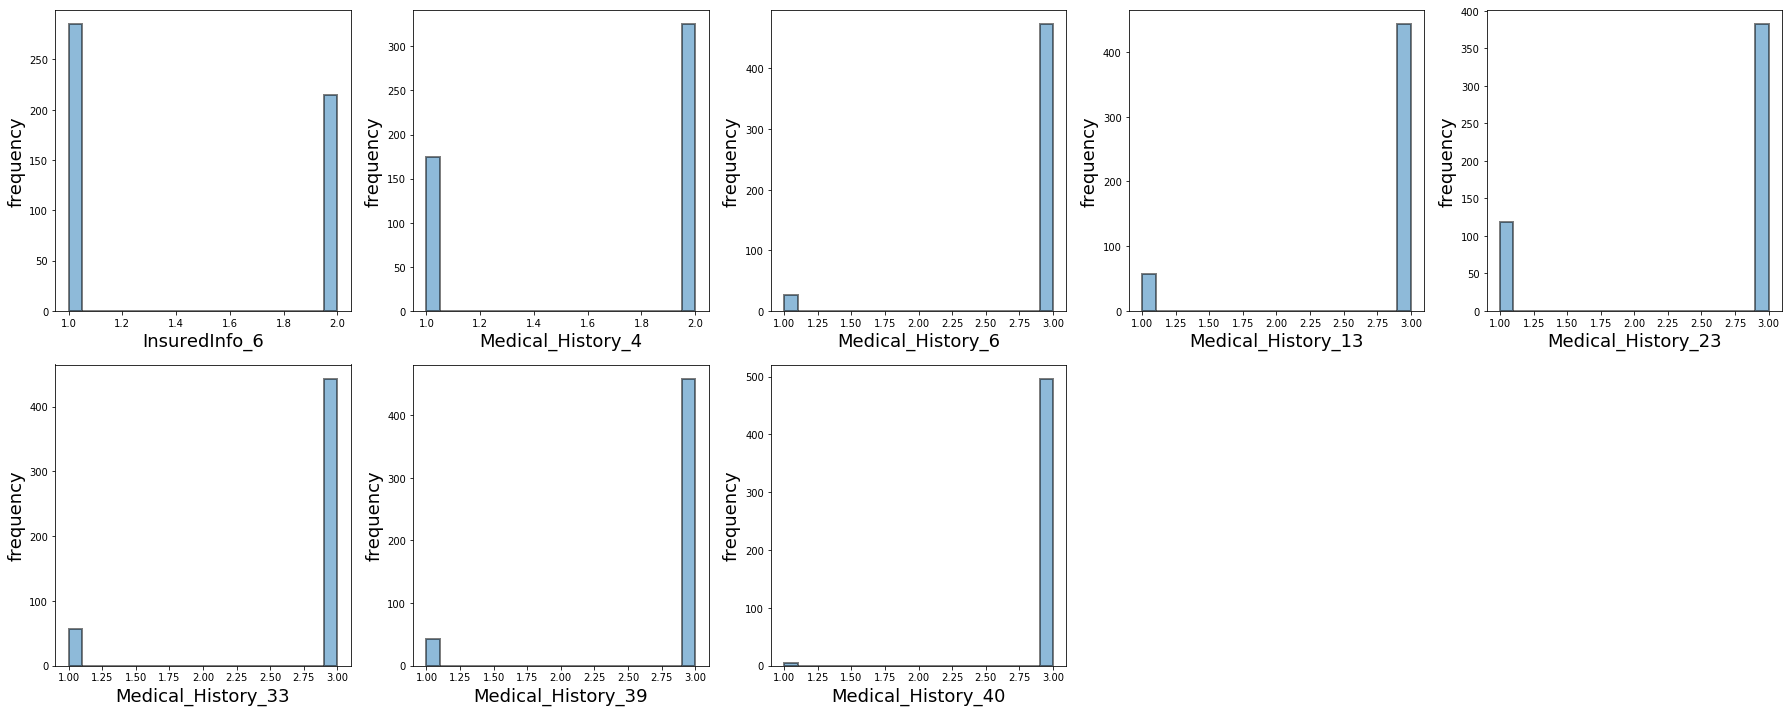

In [24]:
def plot_histgrams(data):
    ncols = len(data.columns)
    fig = plt.figure(figsize=(5 * 5, 5 * (ncols // 5 + 1)))
    for i, col in enumerate(data.columns):
        X = data[col]
        plt.subplot(ncols // 5 + 1, 5, i + 1)
        plt.hist(X, bins=20, alpha=0.5, \
                 edgecolor="black", linewidth=2.0)
        plt.xlabel(col, fontsize=18)
        plt.ylabel("frequency", fontsize=18)
    fig.tight_layout()
    plt.show()
    
continuous_data = final_sample[['InsuredInfo_6', 'Medical_History_4', 'Medical_History_6', 'Medical_History_13', 'Medical_History_23', 'Medical_History_33', 'Medical_History_39', 'Medical_History_40']]       
plot_histgrams(continuous_data)# display categorical data


<a id=section4></a>
### 4 Linear Regression Model

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split

#X = final_data.loc[]

#X = final_data[final_data.columns[~final_data.columns.isin(['Response'])]]
X = final_data.loc[:, final_data.columns != 'Response']
y = final_data.Response


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print('Shape of X_train', X_train.shape)
print('Shape of y_train', y_train.shape)

#Fitting the model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

#predicting on test data
y_pred_test = linreg.predict(X_test)
print('Test Pred Value:', y_pred_test)

#Understanding the intercept and coefficients
print('Intercept:', linreg.intercept_)
print('Coefficients:\n', linreg.coef_)

ftre_cols = ['Product_Info_4', 'InsuredInfo_6', 'Medical_History_4', 
             'Medical_History_6', 'Medical_History_13', 'Medical_History_23', 
             'Medical_History_33', 'Medical_History_39', 'Medical_History_40']
ftre_cols.insert(0, 'Intercept')
coef = linreg.coef_.tolist()
coef.insert(0, linreg.intercept_)

zipp = zip(ftre_cols, coef)
for c1, c2, in zipp:
    print(c1, c2)



Shape of X_train (41566, 9)
Shape of y_train (41566,)
Test Pred Value: [2.92042291 7.04637319 5.90449822 ... 5.02293097 6.83772405 6.14386541]
Intercept: -5.157238148225159
Coefficients:
 [1.35302434 0.4861926  0.79663005 0.413429   0.33561685 0.53620098
 0.15437653 0.71189817 0.8182833 ]
Intercept -5.157238148225159
Product_Info_4 1.3530243419531467
InsuredInfo_6 0.4861925960693158
Medical_History_4 0.7966300542449155
Medical_History_6 0.41342899718821186
Medical_History_13 0.3356168498738288
Medical_History_23 0.5362009811324052
Medical_History_33 0.15437652665780713
Medical_History_39 0.7118981713478084
Medical_History_40 0.8182832961784522


D:\Personal\Softwares\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Analysing the equation

y(Response) = -5.1 + 1.35 * Product_Info_4  + 0.48 * InsuredInfo_6 + 0.79 * Medical_History_4 + 0.41 * Medical_History_6 
                + 0.33 * Medical_History_13 + 0.53 * Medical_History_23 + 0.15 * Medical_History_33 
                + 0.71 * Medical_History_39 + 0.81 * Medical_History_40 

#### Model Interpretation

- Product_Info_4: One unit increase in this would increase the rating value for 'Response' by 1.35
- InsuredInfo_6: One unit increase in this would increase the rating value for 'Response' by 0.48
- Medical_History_4: One unit increase in this would increase the rating value for 'Response' by 0.79
- Medical_History_6: One unit increase in this would increase the rating value for 'Response' by 0.41
- Medical_History_13: One unit increase in this would increase the rating value for 'Response' by 0.33
- Medical_History_23: One unit increase in this would increase the rating value for 'Response' by 0.53
- Medical_History_33: One unit increase in this would increase the rating value for 'Response' by 0.15
- Medical_History_39: One unit increase in this would increase the rating value for 'Response' by 0.71
- Medical_History_40: One unit increase in this would increase the rating value for 'Response' by 0.81

__RMSE Value__

In [26]:
y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)
#print('Training prediction is:', y_pred_train)
#print('Testing prediction is:', y_pred_test)
#Computing the Root Mear Squared Error
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('Train RMSE value is :', RMSE_train)
print('Test RMSE value is :', RMSE_test)

Train RMSE value is : 2.1781860148834653
Test RMSE value is : 2.1895813740402295


__MAE Mean Absolute Error__

In [27]:
MAE_train = metrics.mean_absolute_error(y_train,y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
print('Train MAE value is :', MAE_train)
print('Test MAE value is  :', MAE_test)


Train MAE value is : 1.766534088191563
Test MAE value is  : 1.7770377912700415


__MAE Mean Squared Error__

In [28]:
MSE_train = metrics.mean_squared_error(y_train,y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

print('Train MSE value is :', MSE_train)
print('Test MSE value is :', MSE_test)

Train MSE value is : 4.744494315433911
Test MSE value is : 4.7942665935439


__R-Squared and adjusted R-Squared values__

In [29]:
yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.20842965340367714 0.20825821887871399


<a id=section401></a>
### 4.1 Building the model with GridSearchCV

In [30]:
from sklearn.model_selection import GridSearchCV
linearRegression = LinearRegression()
#Readying parameters for GridSearchCV
parameters = {'normalize': [True, False], 'copy_X': [True, False]}

#Initialising GridSearchCV:
linearRegression = GridSearchCV(linearRegression, parameters, cv=1979)

#Fitting the model and learning the coefficients
linearRegression.fit(X_train, y_train)

print('Mean cross validated score of the best estimator is:', linearRegression.best_score_)

#Make predictions
y_pred_test = linearRegression.predict(X_test)

#Computing RMSE score
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE value is:', RMSE_test)

Mean cross validated score of the best estimator is: 0.1549969314018837
RMSE value is: 2.1895813740402295


<a id=section5></a>
### 5 Logistic Regression Model

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


print('Shape of X_train', X_train.shape)
print('Shape of y_train', y_train.shape)

#Fitting the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Shape of X_train (41566, 9)
Shape of y_train (41566,)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<a id=section501></a>
#### 5.1 Using the Model for Prediction

In [32]:
#predicting on train data
y_pred_train_log = logreg.predict(X_train)
print('Train Pred Value:', y_pred_train_log)

#predicting on test data
y_pred_test_log = logreg.predict(X_test)
print('Test Pred Value:', y_pred_test_log)

Train Pred Value: [2 6 1 ... 7 8 8]
Test Pred Value: [6 8 8 ... 6 8 8]


- We need an evaluation metric in order to compare our predictions with the actual values.

<a id=section502></a>
#### 5.2 Model evaluation

Error is the deviation of the values predicted by the model with the true values. We will use accuracy score and confusion matrix for evaluation.

#### Model evaluation using accuracy classification score

In [33]:
from sklearn.metrics import accuracy_score
print('Accuracy score for train data is:', accuracy_score(y_train,y_pred_train_log))
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test_log))

Accuracy score for train data is: 0.422725304335274
Accuracy score for test data is: 0.4208251473477407


#### Model Evaluation using confusion matrix

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test_log))
# Response being the target variable which is ordinal:
# AR is Actual Response and PR is Predicted Response
confusion_matrix.index = ['AR-1', 'AR-2', 'AR-3', 'AR-4','AR-5', 'AR-6', 'AR-7', 'AR-8']
confusion_matrix.columns = ['PR-1', 'PR-2', 'PR-3', 'PR-4','PR-5', 'PR-6', 'PR-7', 'PR-8']
print(confusion_matrix)

      PR-1  PR-2  PR-3  PR-4  PR-5  PR-6  PR-7  PR-8
AR-1   200   290     0     0     0   541   251   667
AR-2   104   312     0     0     0   569   264   709
AR-3    14    11     0     0     0   186     6    99
AR-4    15     4     0     0     0   213     3   180
AR-5    43   114     0     0     1   396   236   836
AR-6    73   189     0     0     0  1309   351  1397
AR-7    48    51     0     0     0   421   568  1301
AR-8    10    34     0     0     0   548   144  5107


Setting the threshold to __0.75__

In [35]:
preds1 = np.where(logreg.predict_proba(X_test)[:,1]> 0.75,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds1))

Accuracy score for test data is: 0.0


Setting the threshold to __0.25__

In [36]:
preds2 = np.where(logreg.predict_proba(X_test)[:,1]> 0.25,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds2))

Accuracy score for test data is: 0.018523715969688465


<a id=section></a>
#### Calculating Precision, Recall, F1, Average Precision scores

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

precision = precision_score(y_test, y_pred_test_log, average='micro')
print('Precision score is:', precision)

recall = recall_score(y_test, y_pred_test_log, average='micro')
print('Recall score is:', recall)

f1score = f1_score(y_test, y_pred_test_log, average='micro')
print('F1 score is:', f1score)

Precision score is: 0.4208251473477407
Recall score is: 0.4208251473477407
F1 score is: 0.4208251473477407
